In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold,StratifiedKFold,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint as sp_randint


import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp 


from sklearn import preprocessing, model_selection
np.random.seed(1337)
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers, models, callbacks, optimizers


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


from eli5.sklearn import PermutationImportance
import eli5
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE

Using TensorFlow backend.


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: <class '_frozen_importlib._ModuleLockManager'> returned a result with an error set

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [2]:
dataset = pd.read_csv('hw3_labeled_data.csv')
dataset2 = pd.read_csv('hw3_unlabeled_data.csv') 
dataset_ohe = pd.get_dummies(dataset, columns = ['sg', 'al', 'su'])
Xmain = dataset_ohe.drop(["Unnamed: 0" ,"classification"], axis = 1)
y = dataset.iloc[:,25]

dataset2_ohe = pd.get_dummies(dataset2, columns =  ['sg', 'al', 'su'])
X_test = dataset2_ohe.drop(["Unnamed: 0"], axis = 1)
X_test.insert(31,"al_5", 0)
Xmain.head(10)


,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2,al_3,al_4,al_5,su_0,su_1,su_2,su_3,su_4,su_5
0,56,80,1,1,0,0,165,55.0,1.8,141,...,0,0,0,0,1,0,0,0,0,0
1,70,70,1,0,1,1,171,153.0,5.2,137,...,0,0,0,0,1,0,0,0,0,0
2,76,70,1,1,0,0,92,29.0,1.8,133,...,0,0,0,0,1,0,0,0,0,0
3,51,60,1,1,0,0,99,38.0,0.8,135,...,0,0,0,0,1,0,0,0,0,0
4,58,70,1,1,0,0,88,16.0,1.1,147,...,0,0,0,0,1,0,0,0,0,0
5,55,80,1,1,0,0,130,50.0,1.2,147,...,0,0,0,0,1,0,0,0,0,0
6,48,80,1,1,0,0,75,22.0,0.8,137,...,0,0,0,0,1,0,0,0,0,0
7,62,70,1,0,0,0,122,42.0,1.7,136,...,0,1,0,0,1,0,0,0,0,0
8,60,70,1,1,0,0,124,52.0,2.5,139,...,0,1,0,0,1,0,0,0,0,0
9,44,70,1,1,0,0,106,25.0,0.9,150,...,0,0,0,0,1,0,0,0,0,0


In [3]:
X_test.head(10)

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2,al_3,al_4,al_5,su_0,su_1,su_2,su_3,su_4,su_5
0,69,70,1,0,1,1,214,96.0,6.3,120.0,...,0,0,1,0,0,0,0,1,0,0
1,81,60,0,0,0,0,148,39.0,2.1,147.0,...,0,0,0,0,1,0,0,0,0,0
2,45,80,0,0,0,0,107,15.0,1.0,141.0,...,0,0,0,0,1,0,0,0,0,0
3,30,80,1,1,0,0,96,25.0,0.5,144.0,...,0,0,0,0,1,0,0,0,0,0
4,65,90,0,1,0,0,270,39.0,2.0,131.0,...,1,0,0,0,0,1,0,0,0,0
5,65,80,1,1,0,0,115,32.0,11.5,139.0,...,0,0,0,0,1,0,0,0,0,0
6,45,80,1,1,0,0,117,46.0,1.2,137.0,...,0,0,0,0,1,0,0,0,0,0
7,71,90,1,0,1,1,88,80.0,4.4,139.0,...,1,0,0,0,1,0,0,0,0,0
8,54,70,0,1,0,0,233,50.1,1.9,131.0,...,0,0,0,0,1,0,0,0,0,0
9,60,90,0,1,0,0,269,51.0,2.8,138.0,...,0,1,0,0,0,0,1,0,0,0


## 50,000 ft View

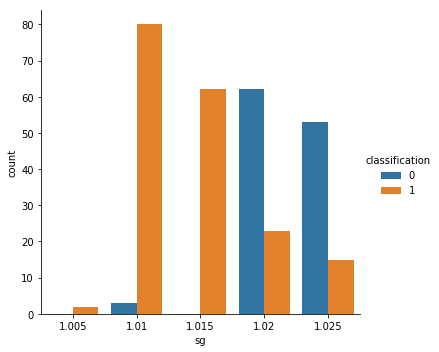

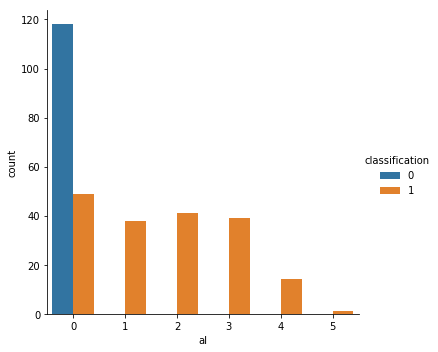

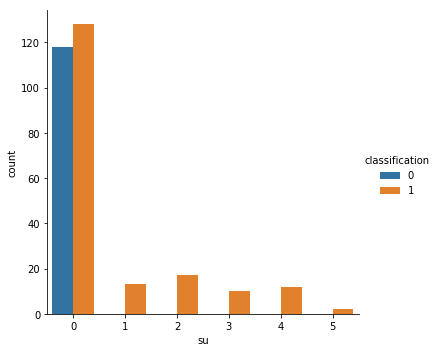

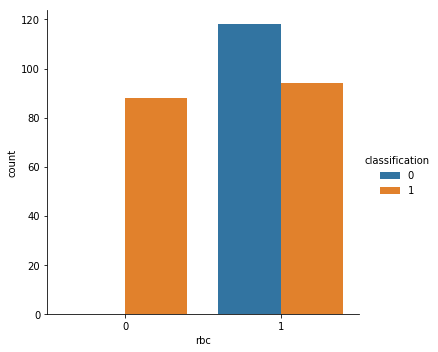

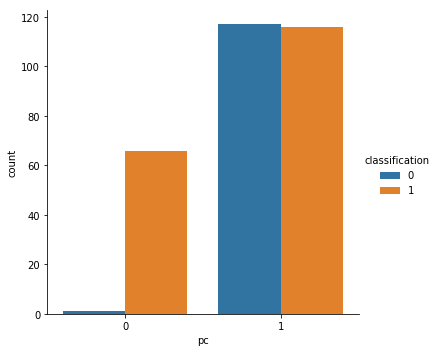

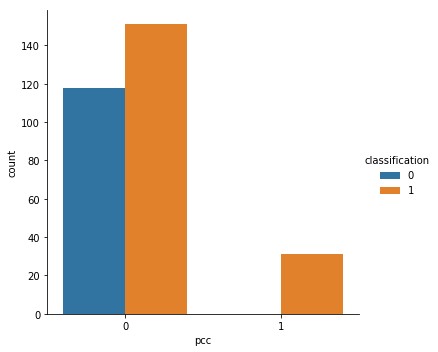

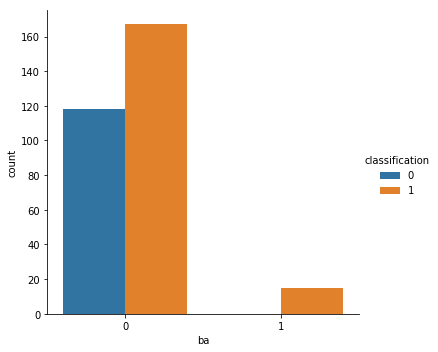

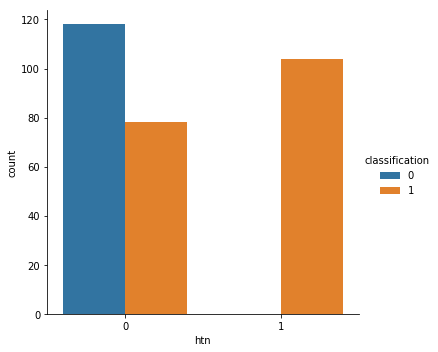

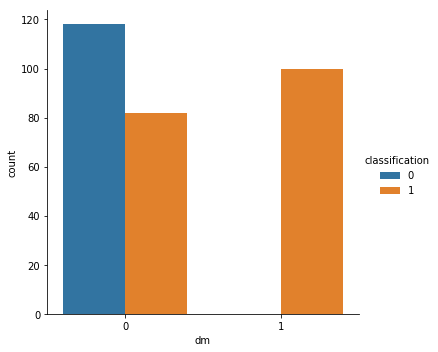

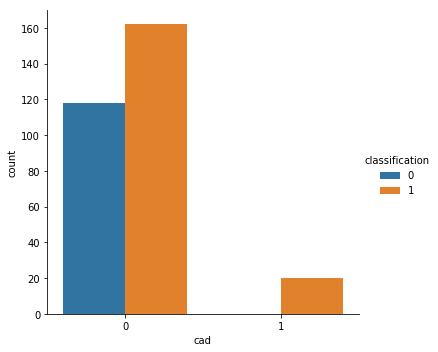

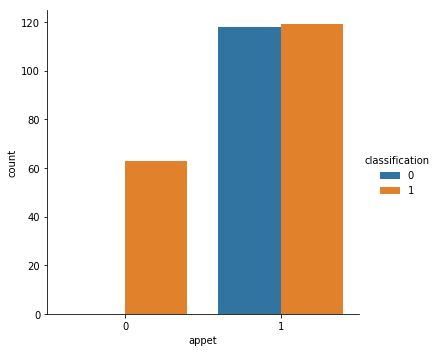

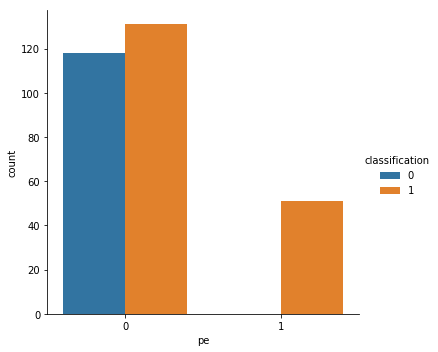

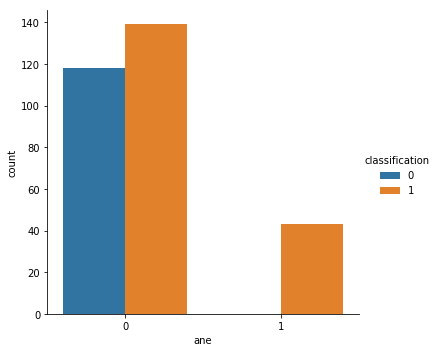

In [4]:
bank = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba','htn', 'dm',
       'cad', 'appet', 'pe', 'ane' ]
for i in bank:
    sns.catplot(x = i, kind = 'count', hue = 'classification', data = dataset)

Looking at the categorical variables plotted above delineated by their class, we observe certain "skewness" that would greatly help our model identify or become more certain on what class that patient belongs to (CKD/ No CKD). Additionally, we should note that the multi-class features that will One-Hot Encoded in the subsequent steps will enable myself to select just one or two columns of the 5 one hot encoded columns of a 6 feature variable for example. 

Assuming 1 implies CKD and 0 implies no CKD. 

For specific gravity, we observe a clear identifier at levels of 1.01 and 1.015 showing that if there are patients at that level, they are almost certainly having CKD. 

For Albumin, we see a similar pattern at levels of 1,2,3,4 and 5, where all patient counts at those levels are patients with CKD.

We get a mirror image with the variable Sugar as well, with levels 1,2,3,4,5 all have CKD. 

For RBC, at a 0 level, all the patients have occurences of CKD, and a level of 1 has a fairly balanced distribution. 

For PC, we get a skewed distribution at a level of 0 and balanced at 1. Again, this would help us find the correct prediction by identifying these patterns. 

For PCC, in my opinion, we don't have much to draw upon. A a level of 1, we only have patient counts who have CKD, but the counts is only around 30, and that is not enough of a sample size to generalize for over 300 patients. Again, this could be interpreted differently by someone else. 

Similarly to PCC, BA has a similar situation where even though a skewness exists at level 1, the sample size is not enough.

HTN at a level 1, has a high count level of patients only having CKD. This would be a good feature to look first. 

For DM, we notice  a similar distribution as HTN where level 1 only has patients with CKD.

In CAD, we notice a skewness, but the sample size is not enough to definetely decide. 

For APP, we see patients at level 0 have only counts of CKD. This could also be a good feature. 

PE  and ANE, has a skewness at level 1 where all patients have only CKD. 

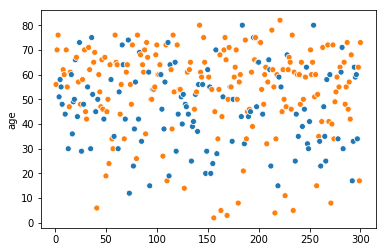

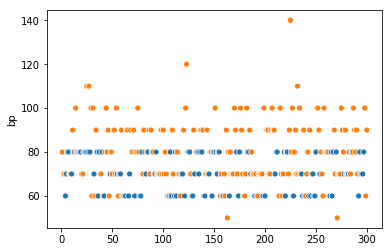

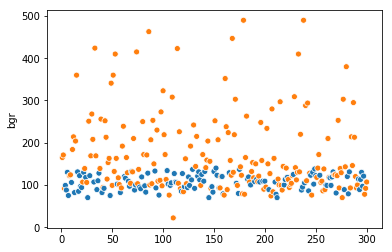

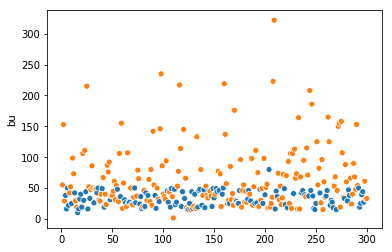

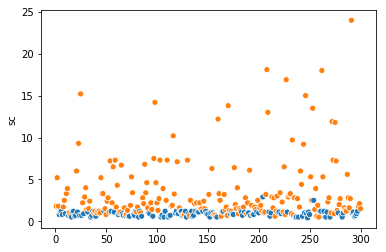

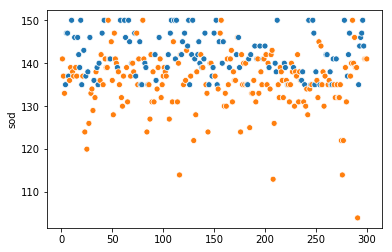

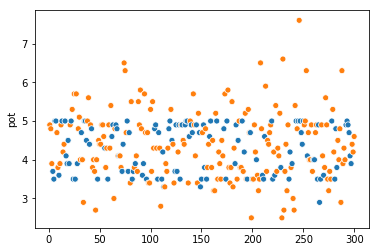

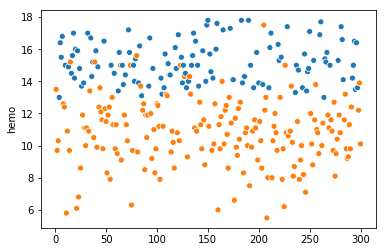

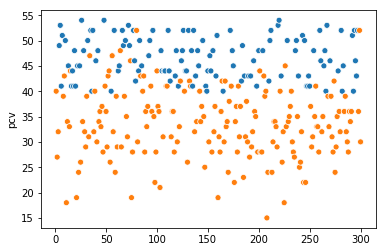

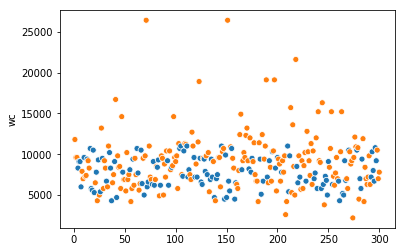

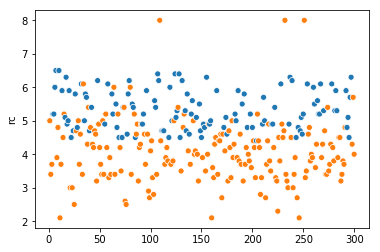

In [5]:
bank = ['age','bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc' ]
for i in bank:
    plt.figure()
    sns.scatterplot(x = range(1,301),y = i, hue = 'classification', legend = False, data = dataset)
    

I will not be going into each plot for the continuous data. This is because very little information can be discerenced from it with a quick analysis. It would be a better worth of my time, performing a feature selection method that helps with this process. 

## Model Selection

I will be implementing a feed forward neural network using tensorflow/keras. The labelled data will be split 80/20 for train/test. 

For ease of implementation, the input layer will intially contain the entire training portion of the labelled dataset including one hot encoded columns of the categorical variables. For implementation, my input layer will contain 512 neurons, and my output layer will contain 1 nueron (binary endpoint). The 4 hidden layers will halve each layers, i.e. 256 nodes in Hidden layer 1, 128 in layer 2, 64 in layer 3, 32 in layer 4, 16 in layer 5. I will be using be using 'relu' as my activation function, and this be selected through brute force accuracy in comparison to other activation functions.  This model will then be used to perform feature selection. 

To implement regularization, I will be using early stopping which presents a near gurantee to prevent overfitting in my model. In comparison to dropout, early stopping is more robust. As a result, the number of epochs will not be a hyperparameter I will be interested in as early stopping deals with that indirectly. 


A problem with feature selection with black-box models like Neural Networks, is the fact that Keras models don't have a coef_ or best_features_ parameter to draw feature statistics. One alternative would be to use Recursive Feature Elimination (RFE) or SelectFromModel to feature select. Again, we hit the roadblock of our model not have the parameters to extract feature stats. I will use the Keras Classifier to wrap my NN model and plug it into a Permutation Importance function from the eli5 package. 

Permutation importance is calculated after the intial fit to the training data. This works to lessen computation time as only one fit is made. It then cycles through all our features one by one, and shuffles the data within that column (row 15 intially is now at row 300), and calulated the amount the loss function gets affected by. By calculating these weights, we perform feature selection. The subset you want to take is left to my discretion and I will retain features with a weight greater than 0.001. This will reduce my feature space while still retaining much of my model power. 

These selected features will be thrown into a second iteration of the model, with an updated input dimension size to account for feature selection. Additionally, in this model I will perform a5 fold  GridSearch to select optimal parameters for learning rate and batch size. A behind the scenes optimizer grid search was performed between SGD and Adam and Adam was chosen as the better one. 

Using the optimal features, the final model will be trained on the training portion of the labelled data and predicted on the testing portion. Requested metrics will be presented. The same model will be used to predict on the unlabelled data and saved as a CSV. 


In [6]:
X_train, X_val, y_train, y_val = train_test_split(Xmain, y, test_size=0.2, random_state=1) # test/train split 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
def model():
    model = Sequential()
    model.add(Dense(512, input_dim = 38, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    #adam = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.0, nesterov=False)
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss = 'binary_crossentropy' , optimizer = adam , metrics = ['accuracy'] )

    return model


early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001,patience=10, verbose=0, mode='auto')


modelo = KerasClassifier(build_fn = model, epochs = 200,batch_size=8, validation_split=0.15, callbacks=[early_stopping])




In [8]:
modelo.fit(X_train,y_train)

Train on 204 samples, validate on 36 samples
Epoch 1/200
204/204 [==============================] - 1s 3ms/step - loss: 0.3254 - acc: 0.8873 - val_loss: 0.0304 - val_acc: 1.0000
Epoch 2/200
204/204 [==============================] - 0s 416us/step - loss: 0.0344 - acc: 0.9902 - val_loss: 0.0642 - val_acc: 0.9722
Epoch 3/200
204/204 [==============================] - 0s 470us/step - loss: 0.0161 - acc: 0.9951 - val_loss: 0.1323 - val_acc: 0.9444
Epoch 4/200
204/204 [==============================] - 0s 527us/step - loss: 0.0320 - acc: 0.9951 - val_loss: 0.0157 - val_acc: 1.0000
Epoch 5/200
204/204 [==============================] - 0s 727us/step - loss: 0.0256 - acc: 0.9902 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 6/200
204/204 [==============================] - 0s 664us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 7/200
204/204 [==============================] - 0s 667us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 8/200


## Feature Selection

In [9]:
pemrs = PermutationImportance(modelo, random_state = 23).fit(X_train,y_train)

240/240 [==============================] - 0s 258us/step


In [10]:
eli5.show_weights(pemrs)

Weight,Feature
0.0333 ± 0.0158,x2
0.0258 ± 0.0162,x11
0.0083 ± 0.0091,x30
0.0058 ± 0.0067,x8
0.0058 ± 0.0041,x12
0.0050 ± 0.0033,x35
0.0050 ± 0.0082,x6
0.0033 ± 0.0062,x5
0.0033 ± 0.0062,x33
0.0025 ± 0.0041,x21


In [11]:
Xmain.columns[pemrs.feature_importances_ > 0.001]


Index(['age', 'rbc', 'ba', 'bgr', 'sc', 'sod', 'hemo', 'pcv', 'dm', 'sg_1.005',
       'sg_1.01', 'sg_1.015', 'sg_1.025', 'al_3', 'al_4', 'su_1', 'su_3',
       'su_4', 'su_5'],
      dtype='object')

I remake the train and test splits with the feature selected columns.

In [12]:
Xmain = Xmain[Xmain.columns[pemrs.feature_importances_ > 0.001]]

X_train, X_val, y_train, y_val = train_test_split(Xmain, y, test_size=0.2, random_state=1) # test/train split 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [13]:
inputd = X_train.shape[1]

## GridSearchCV 

I also redefine my model to get it ready for Hyperparameterization. I will perform a grid search over learning rate and batch size. I will not consider any optimizer other than Adam. This is because, as evident in the commented out line, I already when through a run with SGD with momentum and learning rate, and got worse results than with Adam.

In [14]:
def model(lr = 0.001, input_dim = inputd):
    model = Sequential()
    model.add(Dense(512, input_dim = inputd, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    #adam = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.0, nesterov=False)
    adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss = 'binary_crossentropy' , optimizer = adam , metrics = ['accuracy'] )
    

    return model

modelo = KerasClassifier(build_fn = model, epochs = 25,validation_split=0.15)

In [15]:
lrs = [0.0001,0.001,0.002, 0.003, 0.01, 0.02]
steps = [8,12,16,24,32]
param_grid = dict(batch_size = steps, lr = lrs)
param_grid

{'batch_size': [8, 12, 16, 24, 32],
 'lr': [0.0001, 0.001, 0.002, 0.003, 0.01, 0.02]}

In [16]:
grid = GridSearchCV(estimator = modelo, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   35.3s
C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.0min finished


Train on 204 samples, validate on 36 samples
Epoch 1/25
204/204 [==============================] - 1s 6ms/step - loss: 0.6745 - acc: 0.8284 - val_loss: 0.6437 - val_acc: 0.9167
Epoch 2/25
204/204 [==============================] - 0s 476us/step - loss: 0.6286 - acc: 0.9510 - val_loss: 0.5955 - val_acc: 1.0000
Epoch 3/25
204/204 [==============================] - 0s 448us/step - loss: 0.5841 - acc: 0.9853 - val_loss: 0.5449 - val_acc: 1.0000
Epoch 4/25
204/204 [==============================] - 0s 298us/step - loss: 0.5352 - acc: 0.9853 - val_loss: 0.4882 - val_acc: 1.0000
Epoch 5/25
204/204 [==============================] - 0s 321us/step - loss: 0.4778 - acc: 0.9804 - val_loss: 0.4275 - val_acc: 1.0000
Epoch 6/25
204/204 [==============================] - 0s 244us/step - loss: 0.4169 - acc: 0.9902 - val_loss: 0.3649 - val_acc: 1.0000
Epoch 7/25
204/204 [==============================] - 0s 161us/step - loss: 0.3547 - acc: 0.9951 - val_loss: 0.3033 - val_acc: 1.0000
Epoch 8/25
204/204 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EC8AC58438>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'batch_size': [8, 12, 16, 24, 32], 'lr': [0.0001, 0.001, 0.002, 0.003, 0.01, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [17]:
grid.best_params_

{'batch_size': 32, 'lr': 0.0001}

In [18]:
grid.best_score_

0.9958333333333333

## Training Final Model

In [19]:
bs = grid.best_params_['batch_size']
rate = grid.best_params_['lr']

In [20]:
def model(lr = rate,input_dim = inputd):
    model = Sequential()
    model.add(Dense(512, input_dim = inputd, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    #adam = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.0, nesterov=False)
    adam = optimizers.Adam(lr=rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss = 'binary_crossentropy' , optimizer = adam , metrics = ['accuracy'] )
    

    return model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001,patience=10, verbose=0, mode='auto')
modelo = KerasClassifier(build_fn = model,batch_size = bs, epochs = 200,validation_split=0.15,callbacks=[early_stopping])

In [21]:
modelo.fit(X_train,y_train)

Train on 204 samples, validate on 36 samples
Epoch 1/200
204/204 [==============================] - 1s 7ms/step - loss: 0.6747 - acc: 0.7549 - val_loss: 0.6458 - val_acc: 0.9444
Epoch 2/200
204/204 [==============================] - 0s 304us/step - loss: 0.6294 - acc: 0.9608 - val_loss: 0.5938 - val_acc: 1.0000
Epoch 3/200
204/204 [==============================] - 0s 256us/step - loss: 0.5772 - acc: 0.9853 - val_loss: 0.5325 - val_acc: 1.0000
Epoch 4/200
204/204 [==============================] - 0s 234us/step - loss: 0.5165 - acc: 0.9902 - val_loss: 0.4661 - val_acc: 1.0000
Epoch 5/200
204/204 [==============================] - 0s 309us/step - loss: 0.4516 - acc: 0.9902 - val_loss: 0.3947 - val_acc: 1.0000
Epoch 6/200
204/204 [==============================] - 0s 377us/step - loss: 0.3821 - acc: 1.0000 - val_loss: 0.3254 - val_acc: 1.0000
Epoch 7/200
204/204 [==============================] - 0s 300us/step - loss: 0.3143 - acc: 1.0000 - val_loss: 0.2595 - val_acc: 1.0000
Epoch 8/200


Epoch 61/200
204/204 [==============================] - 0s 275us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 62/200
204/204 [==============================] - 0s 289us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 63/200
204/204 [==============================] - 0s 275us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 64/200
204/204 [==============================] - 0s 228us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 65/200
204/204 [==============================] - 0s 181us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 66/200
204/204 [==============================] - 0s 205us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 67/200
204/204 [==============================] - 0s 248us/step - loss: 9.3734e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 68/200
204/204 [======================

## Prediction on Hold-Out Validation Set

In [22]:
pred1 = modelo.predict(X_val)

In [23]:
accuracy_score(y_val,pred1)

1.0

In [24]:
accf = []
specf=[]
sensf=[]
f1f = []

confusion = confusion_matrix(y_val,pred1)
print(confusion)
acc = accuracy_score(y_val, pred1)
f1 = f1_score(y_val,pred1)
TN, FP    = confusion[0, 0], confusion[0, 1]
FN, TP    = confusion[1, 0], confusion[1, 1]
spec = round(TN / float(TN + FP),3)*100
sens = round(TP / float(TP + FN),3)*100
accf.append(acc)
f1f.append(f1)
specf.append(spec)
sensf.append(sens)
dic = {'accuracy': accf, 'F1': f1f, "Specificity": specf, "Sensitivity": sensf}
pd.DataFrame(dic, index = ['Validation'])


[[24  0]
 [ 0 36]]


,accuracy,F1,Specificity,Sensitivity
Validation,1.0,1.0,100.0,100.0


##  Predicting on Test Set

In [25]:
X_test= X_test[Xmain.columns]
X_test_t = scaler.transform(X_test)

C:\Users\MSD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [26]:
pred2 = modelo.predict(X_test_t)


In [27]:
dataset2["classification"] = pred2 #Adding 'Label' column

xport = dataset2.to_csv('hw3_testset_out_.csv') #Exporting to .csv
dataset2.tail(10)  #sample

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
90,patient_390,45,80,1.020,3,0,1,0,0,0,...,37,11000,4.7,0,0,0,0,0,0,1
91,patient_391,71,70,1.020,0,0,1,1,0,0,...,44,9800,6.0,0,0,0,1,0,0,0
92,patient_392,60,90,1.025,4,4,1,1,0,0,...,32,6200,3.6,1,1,1,1,0,0,1
93,patient_393,34,70,1.015,4,0,0,1,0,0,...,48,6900,5.7,0,0,0,1,1,0,1
94,patient_394,65,80,1.015,1,0,0,1,0,0,...,25,6400,3.0,1,1,1,1,1,0,1
95,patient_395,34,60,1.020,0,0,1,1,0,0,...,48,8600,4.9,0,0,0,1,0,0,0
96,patient_396,80,70,1.010,2,0,0,0,0,0,...,37,11000,4.2,1,1,0,1,0,0,1
97,patient_397,22,60,1.025,0,0,1,1,0,0,...,42,7900,6.4,0,0,0,1,0,0,0
98,patient_398,48,80,1.025,4,0,1,0,0,0,...,32,6900,3.4,1,0,0,1,0,1,1
99,patient_399,71,60,1.025,0,0,1,1,0,0,...,42,7700,5.5,0,0,0,1,0,0,0
